In [1]:
# import packages
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]
y_data = iris.target

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, random_state = 1234)

In [3]:
# define a plot function
def plot(model):
    
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)

# Knn model

In [4]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

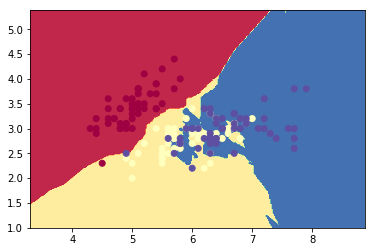

0.7105263157894737

In [5]:
plot(knn)
plt.scatter(x_data[:, 0], x_data[:, 1], c = y_data, cmap=plt.cm.Spectral)
plt.show()
knn.score(x_test, y_test)

# Decision Tree model

In [6]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

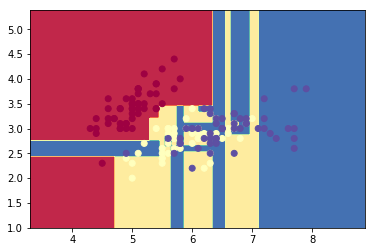

0.5

In [7]:
plot(dtree)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap = plt.cm.Spectral)
plt.show()
dtree.score(x_test, y_test)

# Using Bagging model

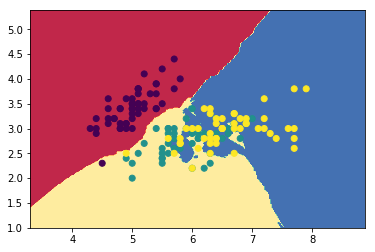

0.6842105263157895

In [8]:
bagging_knn = BaggingClassifier(knn, n_estimators=100)
bagging_knn.fit(x_train, y_train)
plot(bagging_knn)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)

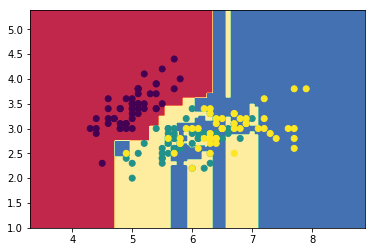

0.5789473684210527

In [9]:
bagging_knn = BaggingClassifier(dtree, n_estimators=100)
bagging_knn.fit(x_train, y_train)
plot(bagging_knn)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)